In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Ejercicio 1

In [3]:
pbi = pd.read_csv("./ep2020inv-pbi.csv",index_col=0)
#pbi=pd.read_csv("http://bit.do/ep2020inv-pbi",index_col=0)
pbi.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,724,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


In [18]:
print(pbi.shape)
print(pbi.columns)
print(pbi.index)

(193, 241)
Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039',
       '2040'],
      dtype='object', length=241)
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)


Hay 193 países representados, hay datos registrados para los años 1800 a 2040.

#### Ejercicio 2

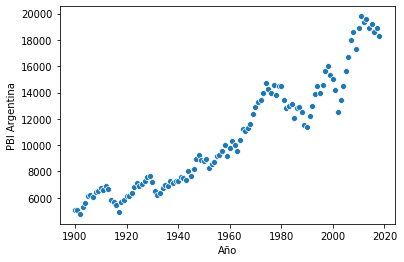

In [32]:
pbi_arg = pbi[[str(x) for x in range(1900,2019)]]
sns.scatterplot(y=pbi_arg.loc['Argentina'],x=list(range(1900,2019)))
plt.xlabel("Año");
plt.ylabel("PBI Argentina");

#### Ejercicio 3

In [34]:
geo=pd.read_csv("./ep2020inv-geo.csv",index_col='name')
#geo=pd.read_csv("http://bit.do/ep2020inv-geo",index_col='name')

In [35]:
print(geo.shape)
print(geo.columns)
print(geo.index)

(197, 11)
Index(['geo', 'four_regions', 'eight_regions', 'six_regions',
       'members_oecd_g77', 'Latitude', 'Longitude', 'UN member since',
       'World bank region', 'World bank, 4 income groups 2017',
       'World bank, 3 income groups 2017'],
      dtype='object')
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Palestine', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe', 'South Sudan'],
      dtype='object', name='name', length=197)


#### Ejercicio 4

In [40]:
geo.groupby('four_regions').count()

,geo,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
four_regions,,,,,,,,,,
africa,54,54,54,53,54,54,54,54,54,0
americas,35,35,35,35,35,35,35,35,35,0
asia,59,59,59,59,59,59,56,59,59,0
europe,49,49,49,49,49,49,48,48,48,0


In [72]:
#Precond: tiene países en su índice
def obtener_region(X):
    try:
        return geo.loc[X.name,'four_regions']
    except:
        print("[ERROR] El país",X.name,"no tiene región")
        return np.nan

#Precond: tiene países en su índice
def agregar_region(df):
    df['region'] = df.apply(obtener_region,axis=1)

pbi2 = pbi.copy()
agregar_region(pbi2)
print(pbi2.groupby('region').count())

[ERROR] El país North Macedonia no tiene región
          1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
region                                                                ...   
africa      54    54    54    54    54    54    54    54    54    54  ...   
americas    35    35    35    35    35    35    35    35    35    35  ...   
asia        57    57    57    57    57    57    57    57    57    57  ...   
europe      46    46    46    46    46    46    46    46    46    46  ...   

          2031  2032  2033  2034  2035  2036  2037  2038  2039  2040  
region                                                                
africa      54    54    54    54    54    54    54    54    54    54  
americas    35    35    35    35    35    35    35    35    35    35  
asia        57    57    57    57    57    57    57    57    57    57  
europe      46    46    46    46    46    46    46    46    46    46  

[4 rows x 241 columns]


#### Ejercicio 5

In [81]:
(pbi.sort_values(by=['2000']))['2000'].iloc[-10:].head(10)

country
Monaco                   50200
Switzerland              50800
Singapore                52400
Norway                   58000
Kuwait                   70100
San Marino               75600
Luxembourg               81700
Brunei                   82100
United Arab Emirates    103000
Qatar                   108000
Name: 2000, dtype: int64

#### Ejercicio 6

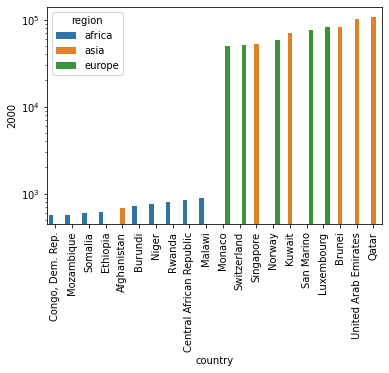

In [125]:
df_pbies = (pbi.sort_values(by=['2000']))[['2000']]
df_pobres = df_pbies.iloc[:10].copy()
df_ricos = df_pbies.iloc[-10:].copy()
df_pbies = pd.concat([df_pobres,df_ricos])
agregar_region(df_pbies)
fig = sns.barplot(x=df_pbies.index,y=df_pbies['2000'],hue=df_pbies['region'])
fig.set_yscale('log')
plt.xticks(rotation=90);

#### Ejercicio 7

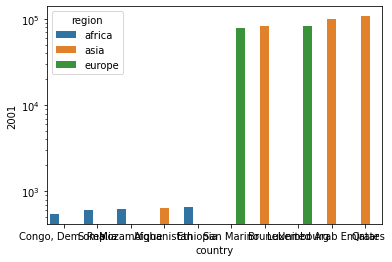

In [132]:
#Precond: recibe un dataframe organizado como pbi
def seleccionar_extremos(df,n,anio):
    df_ret = (df.sort_values(by=[anio]))
    df_first = df_ret.iloc[:n]
    df_last = df_ret.iloc[-(n):]
    df_ret = pd.concat([df_first,df_last])
    return df_ret

df = seleccionar_extremos(pbi, 5, '2001')
agregar_region(df)
fig = sns.barplot(x=df.index,y=df['2001'],hue=df['region'])
fig.set_yscale('log')
plt.xticks(rotation=90)

#### Ejercicio 8